In [0]:
dbutils.fs.cp("dbfs:/FileStore/kaggle.json", "file:/root/.kaggle/kaggle.json")

Out[1]: True

In [0]:
%pip install kaggle

Python interpreter will be restarted.
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=206b941187d5021cfb2ca6951648d37e2143f5c9bf79e15592ed413da8191853
  Stored in directory: /root/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
Python interpreter will be restarted.


In [0]:
%sh
chmod 600 /root/.kaggle/kaggle.json
kaggle datasets download -d ebiswas/imdb-review-dataset



  0%|          | 0.00/2.69G [00:00<?, ?B/s]
  0%|          | 1.00M/2.69G [00:00<08:09, 5.90MB/s]
  0%|          | 2.00M/2.69G [00:00<06:35, 7.30MB/s]
  0%|          | 4.00M/2.69G [00:00<04:44, 10.1MB/s]
  0%|          | 6.00M/2.69G [00:00<03:40, 13.1MB/s]
  0%|          | 9.00M/2.69G [00:00<02:52, 16.7MB/s]
  0%|          | 13.0M/2.69G [00:00<02:06, 22.7MB/s]
  1%|          | 18.0M/2.69G [00:00<01:36, 29.6MB/s]
  1%|          | 25.0M/2.69G [00:01<01:09, 41.0MB/s]
  1%|          | 33.0M/2.69G [00:01<01:03, 44.8MB/s]
  1%|▏         | 41.0M/2.69G [00:01<01:06, 42.6MB/s]
  2%|▏         | 49.0M/2.69G [00:01<01:12, 39.0MB/s]
  2%|▏         | 57.0M/2.69G [00:02<01:30, 31.4MB/s]
  2%|▏         | 65.0M/2.69G [00:03<02:51, 16.5MB/s]
  3%|▎         | 73.0M/2.69G [00:03<02:36, 18.0MB/s]
  3%|▎         | 81.0M/2.69G [00:03<02:07, 22.0MB/s]
  3%|▎         | 89.0M/2.69G [00:03<01:47, 25.9MB/s]
  4%|▎         | 97.0M/2.69G [00:04<01:35, 29.3MB/s]
  4%|▍         | 105M/2.69G [00:04<01:29, 31.2MB/s] 
 

In [0]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [0]:
from zipfile import ZipFile

In [0]:
zf = ZipFile('imdb-review-dataset.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

In [0]:
#import dependencies 
import json 
import re 
import time
import pandas as pd
import os 

In [0]:

dataDir = "/databricks/driver" 
json_files = ["part-01.json", "part-02.json", "part-03.json", "part-04.json", "part-05.json", "part-06.json"]
reviews_list = list()
 
for current_file in json_files:
    print(f" loading...")
    with open(f"{dataDir}/{current_file}", mode='r') as file:
        load_reviews = json.load(file)
        for review in load_reviews:
            reviews_list.append(review)
 
total_count = len(reviews_list)
print(f"Total number of reviews: {total_count:,}")
 
# Convert list of dicts to pandas dataframe
reviews_df = pd.DataFrame(reviews_list)
 

 loading...
 loading...
 loading...
 loading...
 loading...
 loading...
Total number of reviews: 5,571,499


In [0]:
data = reviews_df
data2 = reviews_df

In [0]:
print(data.head)

<bound method NDFrame.head of          review_id         reviewer                          movie rating  \
0        rw5704482    raeldor-96879            After Life (2019– )      9   
1        rw5704483          dosleeb  The Valhalla Murders (2019– )      6   
2        rw5704484  brightconscious           Special OPS (2020– )      7   
3        rw5704485       gasconyway              #BlackAF (2020– )      8   
4        rw5704487     mmason-15867             The Droving (2020)      2   
...            ...              ...                            ...    ...   
5571494  rw0099137       Hairy_Lime               Sami swoi (1967)     10   
5571495  rw0099138     MuffinMan747               Sami swoi (1967)      3   
5571496  rw0099139    TYLERdurden74             Le Samouraï (1967)      9   
5571497  rw0099140           Mankin             Le Samouraï (1967)   None   
5571498  rw0099141        the reach             Le Samouraï (1967)     10   

                                            r

In [0]:
data.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571499 entries, 0 to 5571498
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   review_id       object
 1   reviewer        object
 2   movie           object
 3   rating          object
 4   review_summary  object
 5   review_date     object
 6   spoiler_tag     int64 
 7   review_detail   object
 8   helpful         object
dtypes: int64(1), object(8)
memory usage: 382.6+ MB


In [0]:
data.isna().sum()

Out[10]: review_id              0
reviewer               0
movie                  0
rating            662849
review_summary         0
review_date            0
spoiler_tag            0
review_detail          0
helpful                0
dtype: int64

In [0]:
data=data.dropna(subset=['rating'])
#drop noneType too 
data = data[data["rating"].notna()]



#print(f"New reviews total: {data:,}") 
print(len(data))

4908650


In [0]:
#change rating to int
#change review to date format


data["rating"] = data["rating"].astype(int)


data["review_date"] = pd.to_datetime(data["review_date"])


# Deleting review id
del data['review_id']

In [0]:
# Deleting helpful
del data['helpful']
print(data.duplicated(keep=False).sum())
data =data.drop_duplicates(keep='last')
print(len(data))

30538
4893381


On a rating scale of 1-10, how many movies are in each score category?

10    1174603
8      683474
9      589797
7      565657
1      495676
6      408261
5      311731
4      234331
3      222840
2      207011
Name: rating, dtype: int64


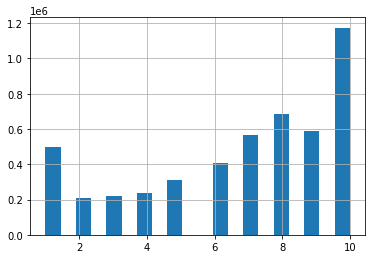

In [0]:
data['rating'].value_counts()
data['rating'].describe()
data['rating'].hist(bins=20)

print(data['rating'].value_counts())


In [0]:
Rating = data.query("rating == 10")
print(Rating["movie"].value_counts().head(10))

Dil Bechara (2020)                                          7188
The Shawshank Redemption (1994)                             5324
Avengers: Endgame (2019)                                    4359
小丑 (2019)                                                   4145
Mrs. Serial Killer (2020)                                   3978
The Dark Knight (2008)                                      3777
The Chosen (2017– )                                         2911
The Lord of the Rings: The Fellowship of the Ring (2001)    2869
Scam 1992: The Harshad Mehta Story (2020)                   2738
The Godfather (1972)                                        2541
Name: movie, dtype: int64


How many unique reviewers have written reviews?

In [0]:
unique_reviewer = len(pd.unique(data['reviewer']))
print(unique_reviewer)


1563426


Movies by production year

In [0]:
data["review_date"] = pd.to_datetime(data["review_date"])
data['year'] = data['review_date'].dt.year
data['year'] = data["year"].astype(int)
data['month']= data['review_date'].dt.month

print(data['month'])
print(data['year'])

0           5
1           5
2           5
3           5
4           5
           ..
5571492    12
5571494    11
5571495     2
5571496    11
5571498     7
Name: month, Length: 4893381, dtype: int64
0          2020
1          2020
2          2020
3          2020
4          2020
           ... 
5571492    2003
5571494    2003
5571495    2004
5571496    1998
5571498    2000
Name: year, Length: 4893381, dtype: int64


In [0]:
unique_movie_vaules = pd.unique(data['movie'])



prodcount = (data[["year", "movie"]]
             .groupby("year")
             .count()
            )
print(prodcount)

#(prodcount
# .rolling(5).mean().rename(columns={"movie":"count"})
# .plot(figsize=(15,5),
#       title="Count of Movies - by production year")
#)

       movie
year        
1998   14390
1999   67022
2000   67231
2001   82855
2002   98765
2003   98635
2004   96424
2005  195063
2006  241296
2007  184320
2008  164054
2009  147481
2010  145161
2011  128142
2012  158692
2013  173437
2014  189381
2015  196866
2016  190490
2017  246689
2018  432270
2019  671165
2020  880973
2021   22579


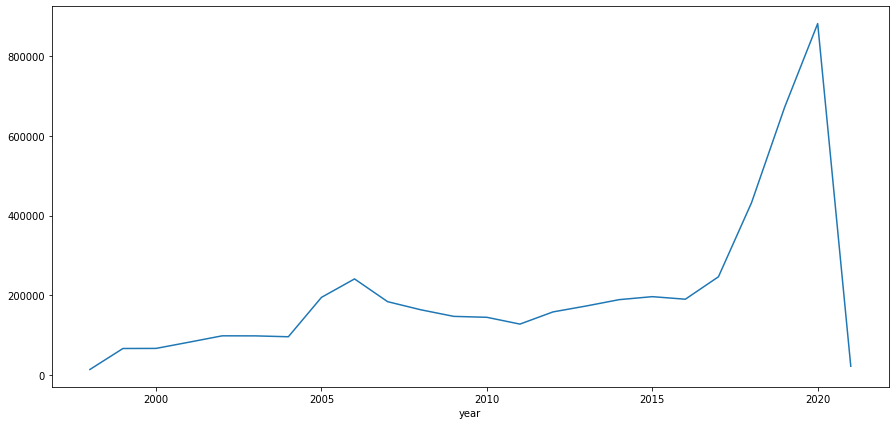

In [0]:
fig, ax = plt.subplots(figsize=(15,7))
year_total= data.groupby(['year']).count()['movie'].plot(ax=ax)
plt.xlabel("year")
plt.ylabel("count of movies")
plt.title("Count of movies per year")

What is the percentage of movies that are marked as spoilers?

In [0]:
# percntage of reviews that are marked as spoilers
data["spoiler_tag"] = data["spoiler_tag"] == 1
spoiler_value_counts = data["spoiler_tag"].value_counts()
current_records_count = len(data["spoiler_tag"])
spoiler_count = spoiler_value_counts[1]
spoiler_pct = spoiler_count / current_records_count * 100
print(f"Out of {current_records_count:,} reviews {spoiler_count:,} are spoilers ({spoiler_pct:.2f}%)\n")
print(spoiler_value_counts)

Out of 4,893,381 reviews 1,085,171 are spoilers (22.18%)

False    3808210
True     1085171
Name: spoiler_tag, dtype: int64


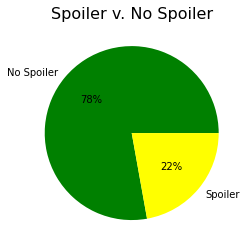

In [0]:
import matplotlib.pyplot as plt
mylabels = ["No Spoiler", "Spoiler"]
colors=['green', 'yellow']
plt.pie(spoiler_value_counts, labels =mylabels, colors = colors, autopct='%.0f%%')
mylabels = [0, 1]
plt.title("Spoiler v. No Spoiler", fontsize=16)

plt.show()

Which movies have the most reviews?

In [0]:
movie_review_count = data["movie"].value_counts()
most_reviewed_movies = movie_review_count.head(1).index[0]
most_reviewed_movies_count = movie_review_count.head(1)[0]
print(f"Most reviewed movie is {most_reviewed_movies}\n")
print(f"Top 10 most reviewed movies and amount of reviews:\n{movie_review_count.head(10)}") 

Most reviewed movie is Avengers: Endgame (2019)

Top 10 most reviewed movies and amount of reviews:
Avengers: Endgame (2019)                                       8666
Dil Bechara (2020)                                             7735
The Shawshank Redemption (1994)                                7706
Game of Thrones: The Iron Throne (2019) Season 8, Episode 6    7258
Captain Marvel (2019)                                          7057
The Dark Knight (2008)                                         6599
小丑 (2019)                                                      6450
Star Wars: Episode VIII - The Last Jedi (2017)                 6344
Mrs. Serial Killer (2020)                                      5377
Wonder Woman 1984 (2020)                                       5222
Name: movie, dtype: int64


/databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 23567 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 19985 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 23567 missing from current font.
  font.set_text(s, 0, flags=flags)
/databricks/python/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 19985 missing from current font.
  font.set_text(s, 0, flags=flags)


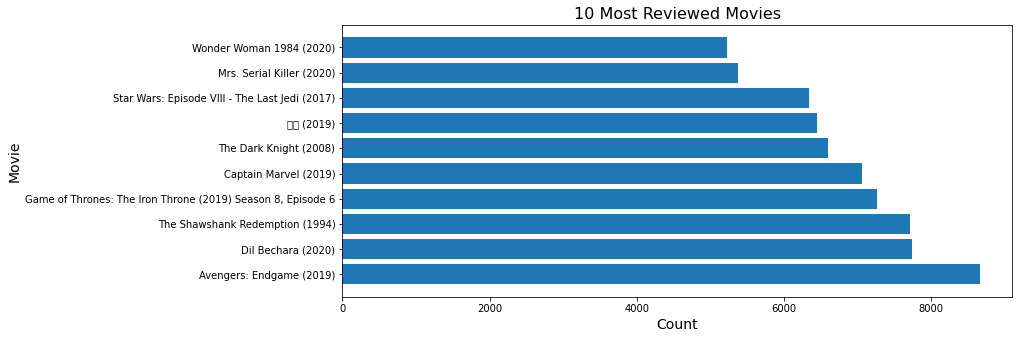

In [0]:
# return number of rows associated to each title
top_ten_movies = data.groupby("movie").size().sort_values(ascending=False)[:10]

# plot the counts
plt.figure(figsize=(12, 5))
plt.barh(y= top_ten_movies.index,
         width= top_ten_movies.values)
plt.title("10 Most Reviewed Movies", fontsize=16)
plt.ylabel("Movie", fontsize=14)
plt.xlabel("Count", fontsize=14)
plt.show()

Which Month are the Most reviews written??

In [0]:
#  Which dates were the most reviews written?
date_review_count = data["month"].value_counts()
unique_date_count = len(date_review_count)
most_reviews_dates = date_review_count.head(1).index[0]
#most_reviews_date_count = date_review_count.head(1)[0]
print(f"Month with most reviews is {most_reviews_dates}\n")
print(f"Top 10 review months:\n{date_review_count.head(10)}")

Month with most reviews is 12

Top 10 review months:
12    467235
1     434708
10    421520
7     417740
11    417105
5     416985
8     415291
4     394031
9     387085
6     386160
Name: month, dtype: int64


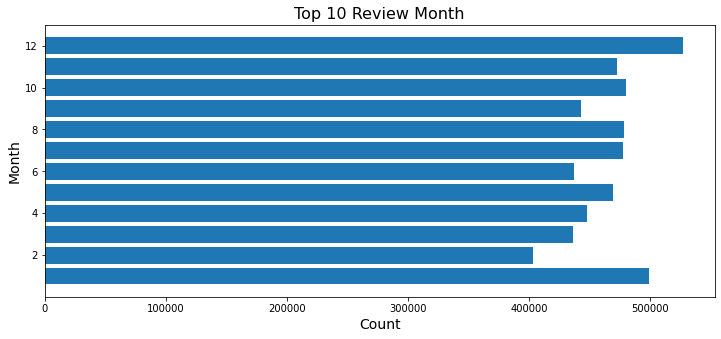

In [0]:
# creating the index and values variables for occupation
month_label= data['month'].value_counts().index
month_label_counts = data['month'].value_counts().values

# plot horizontal bar chart
plt.figure(figsize=(12,5))
plt.barh(y=month_label, width=month_label_counts)
plt.title("Top 10 Review Month", fontsize=16)
plt.ylabel("Month", fontsize=14)
plt.xlabel("Count", fontsize=14)
plt.show()

In [0]:
#  Which dates were the most reviews written?
date_review_count = data["review_date"].value_counts()
unique_date_count = len(date_review_count)
print(f"{unique_date_count:,} unique dates\n")
most_reviews_dates = date_review_count.head(1).index[0]
most_reviews_date_count = date_review_count.head(1)[0]
print(f"Date with most reviews is {most_reviews_dates}\n")
print(f"Top 10 review dates:\n{date_review_count.head(10)}")

8,202 unique dates

Date with most reviews is 2019-05-20 00:00:00

Top 10 review dates:
2019-05-20    7285
2020-07-25    5764
2020-12-26    4883
2020-07-24    4532
2020-12-27    4519
2020-12-28    4196
2020-11-21    3973
2019-05-13    3787
2020-12-29    3642
2020-12-25    3592
Name: review_date, dtype: int64


In [0]:
rating_and_spoiler = data.groupby('rating')[['movie']].mean()
print(rating_and_spoiler)

---------------------------------------------------------------------------
DataError                                 Traceback (most recent call last)
<command-1713551901584859> in <module>
----> 1 rating_and_spoiler = data.groupby('rating')[['movie']].mean()
      2 print(rating_and_spoiler)

/databricks/python/lib/python3.8/site-packages/pandas/core/groupby/groupby.py in mean(self, numeric_only)
   1494         Name: B, dtype: float64
   1495         """
-> 1496         return self._cython_agg_general(
   1497             "mean",
   1498             alt=lambda x, axis: Series(x).mean(numeric_only=numeric_only),

/databricks/python/lib/python3.8/site-packages/pandas/core/groupby/generic.py in _cython_agg_general(self, how, alt, numeric_only, min_count)
   1013         self, how: str, alt=None, numeric_only: bool = True, min_count: int = -1
   1014     ) -> DataFrame:
-> 1015         agg_mgr = self._cython_agg_blocks(
   1016             how, alt=alt, numeric_only=numeric_only, min_co

In [0]:
print("Average rating of a movie: ", data["rating"].mean())

Average rating of a movie:  6.744898261549632


In [0]:
# filter the data to contain only ratings of 10
rating_10 = data[data.rating==10]
 
# top 10 rows ordered by rating and movie 
rating_10.nlargest(10,['rating'])

,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,year,month
5,schroederagustavo,All About Eve (1950),10,Amazing,2020-05-03,False,Having seen this film for the first time today...,2020,5
14,ovandoreyna,"Ruben Brandt, Collector (2018)",10,Magnificent art-animation,2020-05-03,False,"A fenomel animation, a fabulous storyline. A v...",2020,5
16,driftingintime,Cube Zero (2004),10,NOT FOR KIDS!,2020-05-03,False,I actually liked this movie but it traumatized...,2020,5
19,sharonrota,8½ (1963),10,Maybe the biggest masterpiece in the history o...,2020-05-03,False,Everybody should watch this movie. It's pure a...,2020,5
22,sjahidul,Thappad (I) (2020),10,Must watch for all the men!!,2020-05-03,False,I don't usually write reviews but I had to mak...,2020,5
23,swtnlow54,Matchmaker Mysteries: A Fatal Romance (2020) S...,10,Great mystery,2020-05-03,False,I love the two of main characters in this myst...,2020,5
25,moviereviewer6700,Brooklyn Nine-Nine (2013– ),10,My Favourite Show Ever! - This Review Contains...,2020-05-03,True,I already loved Andy Samberg from the Lonely I...,2020,5
26,lizadeegan,After Life (2019– ),10,A work of pure genius,2020-05-03,False,I love everything about this show. I thought t...,2020,5
29,isaharo,Vida (2018–2020),10,Hooked!,2020-05-03,False,My girlfriend and I just started watching it a...,2020,5
34,kryss-19208,Hollywood (2020),10,Incredible,2020-05-03,True,This show was incredible. Every bit was so sat...,2020,5


In [0]:
Data Analysis: What are the top 10 worst reviewed movies?

Object `movies` not found.


In [0]:
 
# filter the data to contain onyl ratings of 1
rating_1 = data[data.rating==1]
 
#bottom 10 rows ordered by rating and movie 
rating_1.nsmallest(10,'rating')

,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,year,month
24,jamesmwanzia-62626,Dangerous Lies (2020),1,Some b***$h!t,2020-05-03,True,Low budget though had a good cast but too many...,2020,5
27,pmc69,Fool's Gold (I) (2008),1,Terrible,2020-05-03,False,One of the worst movies i have ever seen. Terr...,2020,5
32,seanbrowne-30204,Once Upon a Time in London (2019),1,"One word, Pony",2020-05-03,True,What a load of tosh....absolute waste of time....,2020,5
36,saumitrashanu,Four More Shots Please (2019– ),1,Messing upon situation,2020-05-03,False,"Unrealistic, I mean the way they are living is...",2020,5
44,arrmeen,Mrs. Serial Killer (2020),1,Can I please post a 0 rating here? I had to gi...,2020-05-03,False,"Oh my god ,what in the world's name is this is...",2020,5
49,robertbv,Roped (2020),1,Very predictible sweet movie,2020-05-03,False,A very predictible sweet little movie. It has ...,2020,5
51,burkebuilder,Brightburn (2019),1,Not good,2020-05-03,True,No good place to start a review for a bad movi...,2020,5
67,anooppinto,Mrs. Serial Killer (2020),1,Pathetic acting,2020-05-03,False,"One of the worst movies of 2020, bad acting,di...",2020,5
68,moaath_sabbagh,How I Met Your Mother: 46 Minutes (2012) Seaso...,1,boring!!!!!!!!!,2020-05-03,False,Ugh\nhow I met your mother was very good but n...,2020,5
71,viktortje007,Memento Mori (II) (2018),1,See above,2020-05-03,False,The 'Blood and Sand' review is obviously writt...,2020,5
